<h1>Exploring Udemy Courses Dataset</h1>
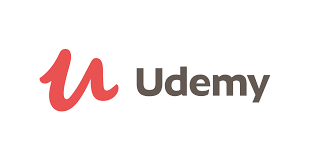
<p>In this kernel, We want to explore udemy courses dataset in general. </p>

<h1>Loading Dataset and Getting Some informations about it</h1>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import re
plt.style.use('ggplot')
sns.set(style='darkgrid', context='notebook')
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
udemy_courses=pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv', parse_dates=['published_timestamp'])
udemy_courses.head(3)

In [ ]:
udemy_courses.info()

<ul>
    <li>convert price column to numeric type</li>
    <li>convert content_duration column to float type column</li>
    <li>convert published_timestamp to datetime type column</li>
</ul>

<h1>Data Cleaning and Prepration for EDA</h1>

In [ ]:
udemy_courses['price']=udemy_courses['price'].str.replace('Free', '0').str.replace('TRUE', '0')
udemy_courses['price']=udemy_courses['price'].astype('float')
udemy_courses['number_of_contents']=udemy_courses['content_duration'].str.extract('([\d\.]+)\s[\w]+').astype('float')
udemy_courses['content_duration_type']=udemy_courses['content_duration'].str.extract('[\d\.]+\s([\w]+)')
udemy_courses.drop('content_duration', axis=1, inplace=True)

In [ ]:
udemy_courses.dropna(inplace=True)

In [ ]:
new_dates=[]
for i in udemy_courses['published_timestamp']:
    new_date=dt.datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ')
    new_dates.append(new_date)
udemy_courses['published_timestamp']=new_dates

In [ ]:
udemy_courses['is_paid'].value_counts()

In [ ]:
udemy_courses['is_paid']=udemy_courses['is_paid'].str.replace('TRUE', 'True')
udemy_courses['is_paid']=udemy_courses['is_paid'].str.replace('FALSE', 'False')

In [ ]:
udemy_courses['content_duration_type']=udemy_courses['content_duration_type'].str.replace('hours', 'hour')

<h1>EDA</h1>
<h2>Basic Knowledge EDA</h2>
<ul>
    <li>How many Free Courses in the dataset, and Explore which Category has the most free courses</li>
    <li>How many Paid Courses in the dataset, and Explore which Category has the most paid courses</li>
    <li>Compare the Average number of subscribers between Paid and Free Courses</li>
    <li>How many Free/Paid Courses in each Level</li>
    <li>Explore the distribution of price column</li>
    <li>Average Prices for each level (Paid Category)</li>
    <li>Relation between number of lectures and price.</li>
    <li>Explore content duration and content duration for each price category</li>
    <li>Published Courses each year.</li>
</ul>

In [ ]:
udemy_courses['is_paid'].value_counts()

In [ ]:
g=sns.catplot(x='subject',
            data=udemy_courses,
            kind='count',
            hue='is_paid')
g.fig.suptitle('free/paid categories comparison', y=1.03)
plt.xticks(rotation=90)
plt.show()

<p>Web Development Category has the most free courses<br>
Business Finance Category has the most free courses.</p>

In [ ]:
pd.pivot_table(index='is_paid', values='num_subscribers', data=udemy_courses, aggfunc='mean')

<p>Average number of subscribers in free courses is greater than the Average number of subscribers in paid courses<br>
    and we can say that this result is expected.</p>

In [ ]:
g=sns.catplot(x='level',
            data=udemy_courses,
            kind='count',
            hue='is_paid')
g.fig.suptitle('free/paid lavel comparison', y=1.03)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Box-plot, CDF, histogram
def cdf(lst):
    x=np.sort(lst)
    y=np.arange(1, len(x)+1)/len(x)
    return x, y
fig, ax=plt.subplots(1,3, figsize=(15,5))
x_price, y_price=cdf(udemy_courses['price'])
ax[0].plot(x_price, y_price)
ax[0].set_title('CDF of prices')
ax[1].hist(udemy_courses['price'])
ax[1].set_title('histogram distribution of prices')
ax[2].boxplot(udemy_courses['price'])
ax[2].set_title('boxplot of prices')
plt.show()
print('median: ',udemy_courses['price'].median())
print('mean: ',udemy_courses['price'].mean())

<p>Right skewed Distribution, we have 1840 courses thier price equal to 45 (median value) or below 45.<br>
no outliers, mean value of price column is 66</p>

In [ ]:
udemy_courses[udemy_courses['is_paid']=='True'].groupby('level')['price'].mean().sort_values(ascending=False)

In [ ]:
price_category=[]
for i in udemy_courses['price']:
    if i==0:
        price_category.append('Free')
    elif i>0 and i<=45:
        price_category.append('cheap')
    elif i>45 and i<=95:
        price_category.append('expensive')
    else:
        price_category.append('very expensive')
udemy_courses['price_category']=price_category

In [ ]:
udemy_courses['price_category'].value_counts()

In [ ]:
# relation between number of lectures and price
udemy_courses.groupby('price_category')['num_lectures'].mean().sort_values(ascending=False)

<p>it is clear now, as the price increases, the number of lectures increase and vice versa.</p>

In [ ]:
udemy_courses['content_duration_type'].value_counts()

<p>here we can see that we have some courses thier content duration are minutes and questions</p> 

In [ ]:
# let's see the courses that thier content duration type = questions.
udemy_courses[udemy_courses['content_duration_type']=='questions']

In [ ]:

mins_courses=udemy_courses[udemy_courses['content_duration_type']=='mins']
g=sns.catplot(x='price_category',
            data=mins_courses,
            kind='count',
            hue='level')
g.fig.suptitle("price category (minutes courses) in each level.", y=1.03, x=0.4)
plt.show()

In [ ]:
udemy_courses['published_timestamp'].dt.year.value_counts().plot.bar()
plt.xlabel('published year')
plt.ylabel('frequency')
plt.title('number of courses published each year(2011-2017)')
plt.show()

In [ ]:
udemy_courses['published_year']=udemy_courses['published_timestamp'].dt.year
pd.pivot_table(index='published_year',
               columns='subject',
               values='course_id',
               data=udemy_courses,
               aggfunc='count',
               fill_value=0)